In [70]:
# load general modules
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Random Forest - <font color='blue'> Classification <font>

In [71]:
# import modules - classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.datasets import load_breast_cancer

### 1) Data preprocessing

In [72]:
data = load_breast_cancer(return_X_y=False)

In [73]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [74]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [75]:
X, y = data.data, data.target
print('{} observations & {} variables'.format(*X.shape))

569 observations & 30 variables


In [76]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=2019,
                                                    stratify=y)

### 2) Train model

In [77]:
# Grid Search
rf = RandomForestClassifier(random_state=2019)

param_grid = {'n_estimators': [10, 50, 100, 200],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 2, 4, 6]}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2019),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]})

In [78]:
print('Best parameters (Grid Search): \n',
      rf_cv.best_params_)

Best parameters (Grid Search): 
 {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}


In [79]:
rf_cv.best_estimator_

RandomForestClassifier(criterion='entropy', random_state=2019)

### 3) Test and Evaluation

In [80]:
y_pred = rf_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[39  3]
 [ 0 72]]


In [81]:
acc = accuracy_score(y_test, y_pred)
print('[Accuracy]: {:.2f}%'.format(acc * 100))

[Accuracy]: 97.37%


### Visualize confusion matrix

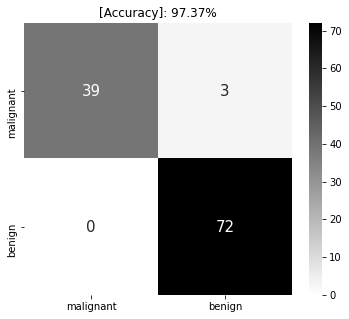

In [82]:
cm = pd.DataFrame(cm, index=data.target_names, columns=data.target_names)

plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True, annot_kws={'size': 15},
            cmap='binary')
plt.title('[Accuracy]: {:.2f}%'.format(acc * 100))
plt.show()


In [83]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

### Feature Importances

In [103]:
# set number of variables to visualize
topK = 15

# Sort: descending order
importances = rf_cv.best_estimator_.feature_importances_
index = np.argsort(importances)[::-1]

In [106]:
data.feature_names[index][:topK]

AttributeError: 'DataFrame' object has no attribute 'feature_names'

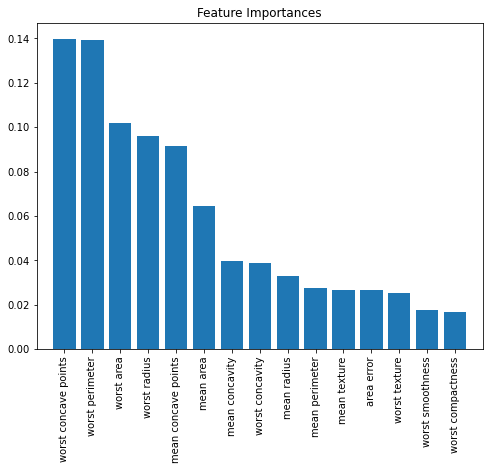

In [86]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.bar(range(topK),
        importances[index][:topK],
        align='center')
plt.xticks(range(topK), data.feature_names[index][:topK], rotation=90)
plt.xlim([-1, topK])
plt.show()

# 2. Random Forest - <font color='blue'> Regression <font>

In [87]:
# import modules - regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### 1) Data preprocessing

In [88]:
# load data
data = pd.read_csv(os.path.join('data', 'house regression.csv'))
data.head()

,lat,long,bedrooms,bathrooms,floors,waterfront,grade,condition,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,year_2014,quarter_0,quarter_1,quarter_2,price
0,47.6747,-122.303,4,2.25,2.0,1,8,5,3750,5000,2440,1310,94,0,0,0,1,0,1310000
1,47.6914,-122.308,2,1.75,1.0,1,6,3,1390,6670,720,670,77,0,0,0,1,0,445500
2,47.5951,-122.144,5,2.00,1.5,1,7,3,1870,7344,1870,0,58,0,0,0,1,0,450000
3,47.3273,-122.370,3,2.00,1.0,1,7,4,1410,44866,1410,0,33,0,0,0,1,0,335000
4,47.3584,-122.163,5,3.00,2.0,1,9,3,3223,6371,3223,0,4,0,0,0,1,0,479349


In [89]:
print(data.columns)

Index(['lat', 'long', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade',
       'condition', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'year_2014', 'quarter_0', 'quarter_1',
       'quarter_2', 'price'],
      dtype='object')


In [90]:
# target variable: price
y = data['price'].values

X = data.drop('price', axis=1)
xcolumns = X.columns.values
X = X.values

In [91]:
print('{} observations & {} variables'.format(*X.shape))

16383 observations & 18 variables


In [92]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=2019)

### 2) Train model

In [93]:
# Grid Search
rf = RandomForestRegressor(random_state=2019)

param_grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [None, 2, 4, 6]}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2019),
             param_grid={'max_depth': [None, 2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]})

In [94]:
print('Best parameters (Grid Search): \n',
      rf_cv.best_params_)

Best parameters (Grid Search): 
 {'max_depth': None, 'n_estimators': 200}


In [95]:
rf_cv.best_estimator_

RandomForestRegressor(n_estimators=200, random_state=2019)

### 3) Test and Evaluation

In [96]:
y_pred = rf_cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('[Mean Squared Error]: {:.2f}'.format(mse))
print('[R-Square          ]: {:.2f}%'.format(r2 * 100))

[Mean Squared Error]: 18449201113.56
[R-Square          ]: 87.09%


### Visualize

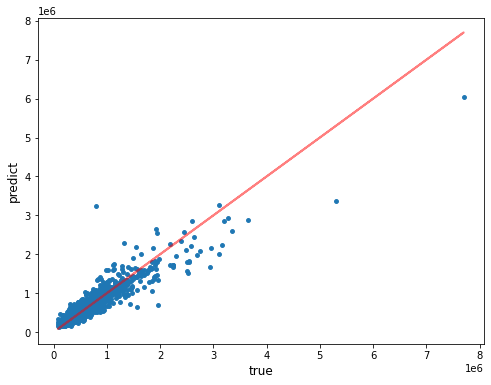

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=15)
plt.plot(y_test, y_test, alpha=0.5, lw=2, color='red')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.show()

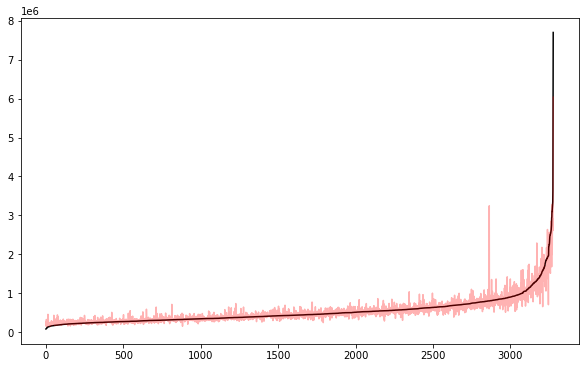

In [98]:
idx = y_test.argsort()

plt.figure(figsize=(10, 6))
plt.plot(y_test[idx], color='black', alpha=1.0)
plt.plot(y_pred[idx], color='red', alpha=0.3)
plt.show()

### Feature Importances

In [99]:
# set number of variables to visualize
topK = 15

# Sort: descending order
importances = rf_cv.best_estimator_.feature_importances_
index = np.argsort(importances)[::-1]

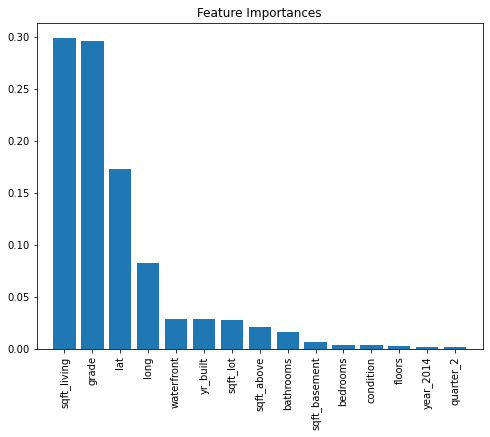

In [100]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.bar(range(topK),
        importances[index][:topK],
        align='center')
plt.xticks(range(topK), xcolumns[index][:topK], rotation=90)
plt.xlim([-1, topK])
plt.show()